## Monte Carlo

蒙特卡罗是一种通过模拟随机事件进行数值计算的方法，在金融工程，计算物理，机器学习等领域有广泛的应用。与之相对的是确定性算法。

### 一些例子

计算圆周率，在一个正方形内$[0,1]\times[0,1]$,随机扔下总数$N$的豆子，统计落在$\frac{1}{4}$圆内的豆子数量为$n$，有
$$\frac{n}{N}\approx\frac{\pi}{4}$$

我们用python实现一下，需要用到的几个模块:

- array，生成$[0,1]$随机数：numpy

- 作图: matplotlib

In [7]:
%matplotlib inline
# 这句是用来确保jupyter可以显示图片的  
import numpy as np
import matplotlib.pyplot as plt

# define random seed
# 设定随机种子确保结果可复现
np.random.seed(1)

N = [100, 1000, 10000, 100000]

def est(n):
    x = np.random.random_sample(n)
    y = np.random.random_sample(n)

    z = (x**2+y**2)<=1
    pi = 4*np.mean(z)
    return pi

for n in N:
    print('Total: %d, est:%f'%(n, est(n)))

Total: 100, est:3.080000
Total: 1000, est:3.132000
Total: 10000, est:3.140400
Total: 100000, est:3.147160


可以看到，这里是符合大数定理的，随着N的增加，逼近$\pi$的精确值

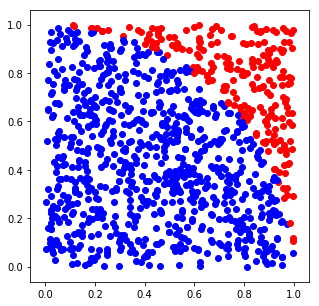

In [19]:
# 画一个模拟图
n = 1000
x = np.random.random_sample(n)
y = np.random.random_sample(n)
z = ((x**2+y**2)<=1).astype(int) # bool -> int
plt.figure(figsize=(5,5))
colors = ['red', 'blue']
for xi,yi,i in zip(x,y,z):
    plt.scatter(xi,yi,color=colors[i])

再来一个小例子，如果你学到随机过程这门课，它有很多很讨人厌的问题需要琢磨，其中有一类问题叫，**排队问题**；有一个经典的概率问题是计算房间里存在两个人**同一天生日**的概率，这个问题有一个动态版本的:

这里有一个空房间，总有人会进入这一房间，且只进不出，服从速率为$\lambda=1$的**泊松过程**，或者说每个人到达的间隔时间服从参数为$\lambda=1$的指数分布，问：房间中有两个人生日是同一天的所需时间的期望值是多少？

In [40]:
# 用公式计算我头都大了
# 如果只是做一个估计，则可以通过模拟的方式
np.random.seed(1)

# 同样利用大数原理，模拟足够多的事件，每次记录所用时间，最后求样本期望，作为对总体的估计
N = [10, 100, 1000, 10000]
D = 365
s = 1
def simulate_one_event(s):
    people = []
    time_used = 0
    while True:
        new_guy = np.random.randint(1,365,1)[0]
        time_i = np.random.exponential(s,1)[0]
        time_used += time_i
        # 假如有相同生日，结束；否则，进入房间等下一个人
        if new_guy in people:
            break
        else:
            people.append(new_guy)
    return people, time_used

for n in N:
    time = []
    for j in range(n):
        _, time_i = simulate_one_event(s)
        time.append(time_i)
    print('N: %d, estimate: %f'%(n, np.mean(time)))

N: 10, estimate: 23.563299
N: 100, estimate: 25.898208
N: 1000, estimate: 25.215546
N: 10000, estimate: 24.540345


### 做个小题目

统计学有一种方法叫bootstrap，它跟Monte Carlo是很类似的，也是通过模拟的方式来做估计，bootstrap的特点则在于重采样。通常我们做参数估计，是对手头有的样本，比如$12.5,14.5,12.7,13.4,15.0$，假设知道它们的总体是正态分布，用样本均值方差来对总体的均值方差等作估计。

bootstrap的想法则不一样，它是把这一些数据当成总体，通过对这一“总体”进行有放回的采样，对统计量做出估计。

问：现有数据$X$，

1. 已知来自正态分布，给出均值估计值和95%置信区间；
2. 采用bootstrap的做法，对数据进行重采样，基于采样数据的估计值，给出均值估计和95%置信区间；与1对比如何。

In [43]:
# 注，这个是给定数据，请基于x作答
np.random.seed(1) 
x = np.random.normal(3,3,20)